In [0]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [80]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

PosixPath('/root/.fastai/data/mnist.pkl.gz')

In [0]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [0]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
n,c = x_train.shape

In [0]:
img = x_train[0]

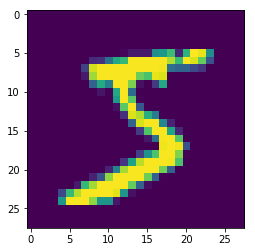

In [84]:
plt.imshow(img.view((28,28)))

In [0]:
weights = torch.randn(784,10)

In [0]:
bias = torch.zeros(10)

In [87]:
x_train.shape

torch.Size([50000, 784])

MAT MUL with element wise multiplication

In [0]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            # Any trailing ",:" can be removed
            c[i,j] = (a[i,:] * b[:,j]).sum() #element wise multiplication
    return c

In [0]:
m1 = x_valid[:5]
m2 = weights

In [90]:
%time t1=matmul(m1, m2)

CPU times: user 1.95 ms, sys: 3.56 ms, total: 5.51 ms
Wall time: 3.41 ms


MAT MUL with brodcasting

In [0]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:]          * b[:,j]).sum() # previous
        c[i]   = (a[i  ].unsqueeze(-1) * b).sum(dim=0)
    return c

In [92]:
m1[1].shape,m1[1]

(torch.Size([784]),
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        

In [93]:
m1[1].unsqueeze(-1).shape,m1[1].unsqueeze(-1) #adds a dimension 1 at -1 idx

(torch.Size([784, 1]), tensor([[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         

MAT MUL in pytorch

In [0]:
t2 = m1@m2


The forward and backward passes

In [0]:
def get_data():
    path = datasets.download_data(MNIST_URL, ext='.gz')
    with gzip.open(path, 'rb') as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
    return map(tensor, (x_train,y_train,x_valid,y_valid))

def normalize(x, m, s): return (x-m)/s

In [0]:
x_train,y_train,x_valid,y_valid = get_data()

In [97]:
train_mean,train_std = x_train.mean(),x_train.std()
train_mean,train_std

(tensor(0.1304), tensor(0.3073))

In [0]:
x_train = normalize(x_train, train_mean, train_std)
# NB: Use training, not validation mean for validation set
x_valid = normalize(x_valid, train_mean, train_std)

In [99]:
train_mean,train_std = x_train.mean(),x_train.std()
train_mean,train_std

(tensor(0.0001), tensor(1.))

In [0]:
def test_near_zero(a,tol=1e-3): assert a.abs()<tol, f"Near zero: {a}"

In [0]:
test_near_zero(x_train.mean())
test_near_zero(1-x_train.std())

In [102]:

n,m = x_train.shape
c = y_train.max()+1
n,m,c

(50000, 784, tensor(10))

In [0]:
nh = 50

In [0]:
# simplified kaiming init / he init
w1 = torch.randn(m,nh)/math.sqrt(m)
b1 = torch.zeros(nh)
w2 = torch.randn(nh,1)/math.sqrt(nh)
b2 = torch.zeros(1)

In [0]:
test_near_zero(w1.mean())
test_near_zero(w1.std()-1/math.sqrt(m))

In [106]:
# This should be ~ (0,1) (mean,std)...
x_valid.mean(),x_valid.std()

(tensor(-0.0057), tensor(0.9924))

In [0]:
def lin(x, w, b): return x@w + b

In [0]:
t = lin(x_valid, w1, b1)

In [109]:
#...so should this, because we used kaiming init, which is designed to do this
t.mean(),t.std()

(tensor(0.0646), tensor(0.9715))

In [0]:
def relu(x): return x.clamp_min(0.)

In [0]:
t = relu(lin(x_valid, w1, b1))

In [112]:
#...actually it really should be this!
t.mean(),t.std()

(tensor(0.4148), tensor(0.5956))

In [0]:
# kaiming init / he init for relu
w1 = torch.randn(m,nh)*math.sqrt(2/m)

In [114]:
w1.mean(),w1.std()

(tensor(-0.0002), tensor(0.0506))

In [115]:
t = relu(lin(x_valid, w1, b1))
t.mean(),t.std()

(tensor(0.5851), tensor(0.8740))

In [0]:
#export
from torch.nn import init

In [0]:
w1 = torch.zeros(m,nh)
init.kaiming_normal_(w1, mode='fan_out') # fan_in is to preserve backward pass and fan_out is to preverse backward pass
t = relu(lin(x_valid, w1, b1))

In [0]:
init.kaiming_normal_??

In [119]:
w1.mean(),w1.std()

(tensor(-7.6925e-05), tensor(0.0506))

In [120]:
t.mean(),t.std()

(tensor(0.6014), tensor(0.8544))

In [121]:
w1.shape

torch.Size([784, 50])

In [0]:
import torch.nn

In [123]:
torch.nn.Linear(m,nh).weight.shape #ths dimesnion is transpose of w1

torch.Size([50, 784])

In [0]:
torch.nn.Linear.forward??

In [0]:
torch.nn.functional.linear??

In [0]:
torch.nn.Conv2d??

In [0]:
torch.nn.modules.conv._ConvNd??

In [0]:
# what if...?
def relu(x): return x.clamp_min(0.) - 0.5

In [129]:
# kaiming init / he init for relu
w1 = torch.randn(m,nh)*math.sqrt(2./m )
t1 = relu(lin(x_valid, w1, b1))
t1.mean(),t1.std()

(tensor(0.0523), tensor(0.8098))

In [0]:
def model(xb):
    l1 = lin(xb, w1, b1)
    l2 = relu(l1)
    l3 = lin(l2, w2, b2)
    return l3

Loss function: MSE

In [131]:
model(x_valid).shape

torch.Size([10000, 1])


We need squeeze() to get rid of that trailing (,1), in order to use mse. (Of course, mse is not a suitable loss function for multi-class classification; we'll use a better loss function soon. We'll use mse for now to keep things simple.)

In [0]:
def mse(output, targ): return (output.squeeze(-1) - targ).pow(2).mean()

In [0]:
y_train,y_valid = y_train.float(),y_valid.float()

In [0]:
preds = model(x_train)

In [135]:
preds.shape

torch.Size([50000, 1])

In [136]:
mse(preds, y_train)

tensor(30.1372)

Gradients and backward pass

In [0]:
def mse_grad(inp, targ): 
    # grad of loss with respect to output of previous layer
    inp.g = 2. * (inp.squeeze() - targ).unsqueeze(-1) / inp.shape[0]

In [0]:
def relu_grad(inp, out):
    # grad of relu with respect to input activations
    inp.g = (inp>0).float() * out.g
    

In [0]:
def lin_grad(inp, out, w, b):
    # grad of matmul with respect to input
    inp.g = out.g @ w.t()
    w.g = (inp.unsqueeze(-1) * out.g.unsqueeze(1)).sum(0)
    b.g = out.g.sum(0)

In [0]:
def forward_and_backward(inp, targ):
    # forward pass:
    l1 = inp @ w1 + b1
    l2 = relu(l1)
    out = l2 @ w2 + b2
    # we don't actually need the loss in backward!
    loss = mse(out, targ)
    
    # backward pass:
    mse_grad(out, targ)
    lin_grad(l2, out, w2, b2)
    relu_grad(l1, l2)
    lin_grad(inp, l1, w1, b1)

In [0]:
forward_and_backward(x_train, y_train)

In [0]:
# Save for testing against later
w1g = w1.g.clone()
w2g = w2.g.clone()
b1g = b1.g.clone()
b2g = b2.g.clone()
ig  = x_train.g.clone()

In [0]:
xt2 = x_train.clone().requires_grad_(True)
w12 = w1.clone().requires_grad_(True)
w22 = w2.clone().requires_grad_(True)
b12 = b1.clone().requires_grad_(True)
b22 = b2.clone().requires_grad_(True)

In [0]:
def forward(inp, targ):
    # forward pass:
    l1 = inp @ w12 + b12
    l2 = relu(l1)
    out = l2 @ w22 + b22
    # we don't actually need the loss in backward!
    return mse(out, targ)

In [0]:
loss = forward(xt2, y_train)

In [0]:
loss.backward()

Refactoring Model


In [0]:
class Relu():
  
  def __call__(self, inp):
    self.inp = inp
    self.out = (inp>0)*inp - 0.5
    return self.out
  
  def backward(self):
    self.inp.g = (self.inp>0).float()*self.out.g
  
  

In [0]:
class Lin():
  def __init__(self, w, b):
    self.w = w
    self.b = b
    
  def __call__(self, inp):
    self.inp = inp
    self.out = inp@self.w + self.b
    return self.out
  
  def backward(self):
    self.inp.g = self.out.g@self.w.t()
    self.w.g = (self.inp.unsqueeze(-1) * self.out.g.unsqueeze(1)).sum(0)
    self.b.g  = self.out.g.sum(0)

In [0]:
class Mse():
    def __call__(self, inp, targ):
        self.inp = inp
        self.targ = targ
        self.out = (inp.squeeze() - targ).pow(2).mean()
        return self.out
    
    def backward(self):
        self.inp.g = 2. * (self.inp.squeeze() - self.targ).unsqueeze(-1) / self.targ.shape[0]

In [0]:
class Model():
  def __init__(self, w1, b1, w2, b3):
    self.layers = [Lin(w1,b1),Relu(),Lin(w2,b2)]
    self.loss = Mse()
    
  def __call__(self, x, targ):
    for l in self.layers: x = l(x)
    return self.loss(x, targ)
  
  def backward(self):
    self.loss.backward()
    for l in reversed(self.layers): l.backward()
 

In [0]:
w1.g,b1.g,w2.g,b2.g = [None]*4
model = Model(w1, b1, w2, b2)

In [169]:
%time loss = model(x_train, y_train)

CPU times: user 133 ms, sys: 296 µs, total: 133 ms
Wall time: 136 ms


In [170]:
%time model.backward()

CPU times: user 4.45 s, sys: 121 ms, total: 4.57 s
Wall time: 4.58 s


nn.Linear and nn.Module

In [0]:
from torch import nn

In [0]:
class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.layers = [nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out)]
        self.loss = mse
        
    def __call__(self, x, targ):
        for l in self.layers: x = l(x)
        return self.loss(x.squeeze(), targ)

In [0]:
model = Model(m, nh, 1)

In [176]:
%time loss = model(x_train, y_train)

CPU times: user 120 ms, sys: 1.17 ms, total: 121 ms
Wall time: 129 ms


In [177]:
%time loss.backward()

CPU times: user 85.4 ms, sys: 2.15 ms, total: 87.6 ms
Wall time: 91.2 ms


In [0]:
init.kaiming_normal_??